# Simulated linearly related random variables

Delivery times $X_1$ and $X_2$ for two products are related through a linear transformation:
$\begin{bmatrix} X_1 \\ X_2 \end{bmatrix} = \begin{bmatrix} 2 & 2 \\ 1 & 4 \end{bmatrix} \begin{bmatrix} Z_1 \\ Z_2 \end{bmatrix} + \begin{bmatrix} 15 \\ 20 \end{bmatrix}$  <br>
where $Z_1$ and $Z_2$ both follow standardized normal distribution N(0,1), and are independent of each other. $Z_1$ and $Z_2$ indicate conditions related to certain raw materials. This notebook simulates the values $X_1$ and $X_2$.

In [1]:
# import libaries
import numpy as np
import matplotlib.pyplot as plt
# set to plot automatically
%matplotlib inline

In [2]:
# set random state so repeatable results
np.random.seed(42)

In [3]:
# Draw conditions for materials
samples=1000
Z = np.random.randn(2,1000)

In [4]:
# calculate X through dot product and addition (broadcasting)
X = np.dot(np.array([[2,2],[1,4]]),Z)+np.array([[15],[20]])

In [5]:
# store values in variables for X1 and X2
X1 = X[0]
X2 = X[1]

# Detect outliers using mahalanobis distance

The Mahalanobis distance can be defined as <br>
$\sqrt {({\vec {x}}-{\vec {\mu }})^{T}S^{-1}({\vec {x}}-{\vec {\mu }})}$ <br>
This can be used to detect outliers as only 5% of **squared** mahalanobis distances are expected to be greater than 5.99 see 'use of mahalnobis distance for detecting outliers and clusters in markedly non-nomal data' available at http://www.dtic.mil/dtic/tr/fulltext/u2/a545834.pdf

In [6]:
# calculate covariance matrix: cov_matrix
cov_matrix=np.cov(X1,X2)

In [7]:
# calculate inverse covariance matrix: inv_cov
inv_cov_matrix=np.linalg.inv(cov_matrix)

In [8]:
# calculate mean of random variable X: mean_X
mean_X=X.mean(axis=1)

In [9]:
# calculate X - mean: part1
part1 = np.transpose(X)-mean_X

In [10]:
# dot product of part 1 with the inv_cov_matrix: part2
part2 = np.dot(part1,inv_cov_matrix)

In [11]:
# calculate squared mahalanobis distance: mahalanobis_distance_sq 
mahalanobis_distance_sq = np.sum(np.multiply(part2,part1),axis=1)

In [12]:
#  only 5% of squared mahalanobis distances are expected to be greater than 5.99
# create mask for outliers
mask = mahalanobis_distance_sq>5.99
# filter outliers
X1_outliers = X1[mask]
X2_outliers = X2[mask]
# remove outliers
X1_new = X1[~mask]
X2_new = X2[~mask]

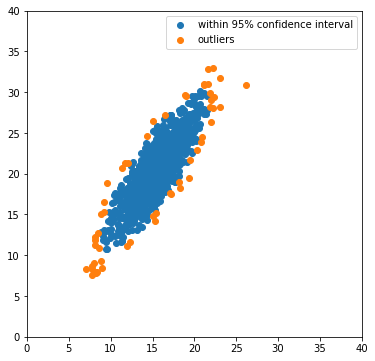

In [13]:
fig = plt.figure(figsize=(6,6));
plt.scatter(X1_new,X2_new,label='within 95% confidence interval');
plt.scatter(X1_outliers,X2_outliers, label='outliers');
plt.legend()
plt.xlim(0,40);
plt.ylim(0,40);